<a href="https://colab.research.google.com/github/Swatijoshi2002/scikitlearn_machinelearning/blob/main/breastcancerdetectionusingmachinelearningalgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import sklearn.datasets 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Data Collection and processing

In [2]:

from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


 code to import loaded file into a dataframe

In [3]:
import io
data_frame= pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [4]:
print(data_frame)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [5]:
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'diagnosis'.
data_frame['label']= label_encoder.fit_transform(data_frame['diagnosis'])
  
data_frame['label'].unique()

array([1, 0])

1 Reprents Malignant
0 Reprents Benign

In [7]:
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,label
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [8]:
data_frame.shape

(569, 34)

Getting information about data(checking for NAN values)

In [9]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In above analysis we can see unnamed32 contains all 569 NAN values
other than Id column in data_frame wont be helping in detecting cancer
Hence remvoing both of these feature values

In [10]:
data_frame.drop(['Unnamed: 32'],axis=1,inplace=True)
data_frame.drop(['id'],axis=1,inplace=True)

In [11]:
data_frame.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,0


In [12]:
data_frame.shape

(569, 32)

In [13]:
data_frame.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
label                      0
dtype: int64

statistical measure of dataset

In [14]:
data_frame.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


checking the distribution of target variables

In [15]:
data_frame['label'].value_counts()

0    357
1    212
Name: label, dtype: int64

0-benign
1-malignant

In [16]:
data_frame.groupby('label').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
label,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


separating the feature and target

In [17]:
y=data_frame['label']
x=data_frame.drop(['label'],axis=1)
print(x)

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

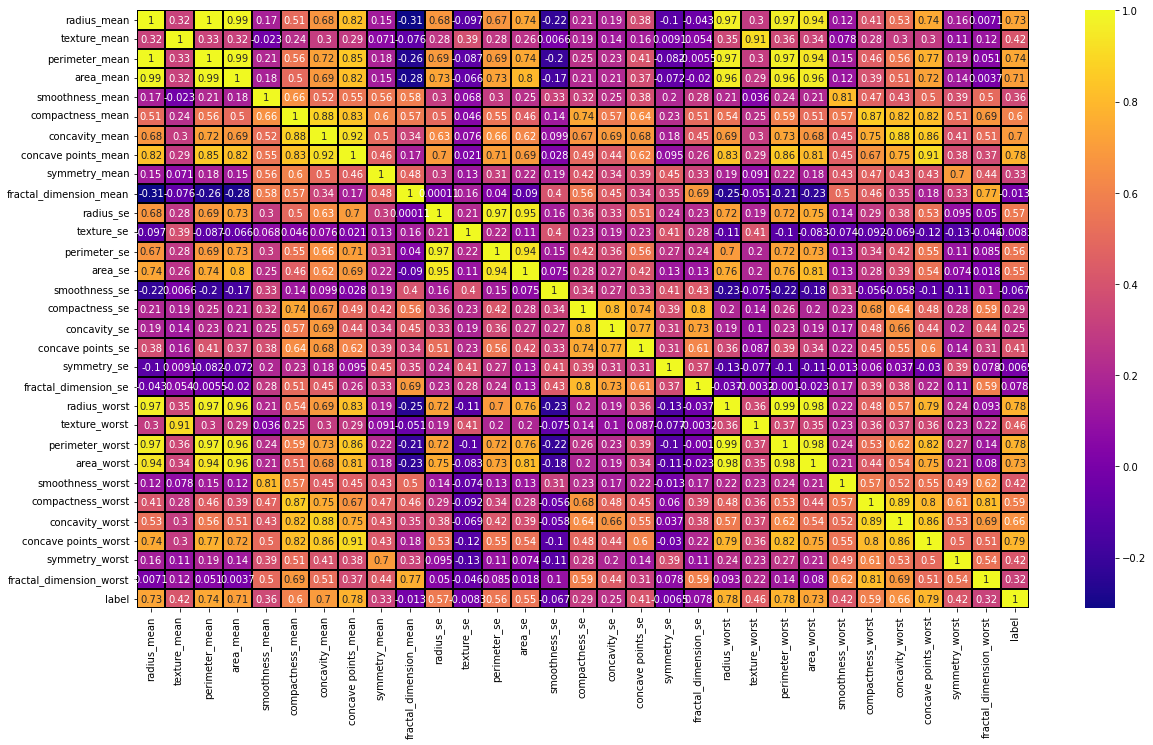

In [106]:
#data visualization
import seaborn as sns
tc = data_frame.corr()
plt.figure(figsize=(20,11))
sns.heatmap(tc, annot = True, cmap ='plasma',annot_kws={'size': 10},
            linecolor ='black', linewidths = 1)

In [28]:
x.drop(['diagnosis'],axis=1,inplace=True)
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: label, Length: 569, dtype: int64


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [30]:
print(x.shape,x_train.shape,x_test.shape)

(569, 30) (455, 30) (114, 30)


feature scaling


In [34]:
from sklearn.preprocessing import StandardScaler
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

In [36]:
from pandas.core.common import random_state
def models(x_train,y_train):
  #logisticRegresiion
  log=LogisticRegression(random_state=0)
  log.fit(x_train,y_train)

  #decision tree
  tree=DecisionTreeClassifier(random_state=0,criterion='entropy')
  tree.fit(x_train,y_train)

  #random forest
  forest=RandomForestClassifier(random_state=0,criterion='entropy',n_estimators=10)
  forest.fit(x_train,y_train)
  
  #accuracy of models
  print('Logistic Regression accuracy:',log.score(x_train,y_train))
  print('Decision Tree accuracy:',tree.score(x_train,y_train))
  print('Random Forest accuracy:',forest.score(x_train,y_train))

  return log,tree,forest
  
  


In [78]:
model=models(x_train,y_train)

Logistic Regression accuracy: 0.989010989010989
Decision Tree accuracy: 1.0
Random Forest accuracy: 1.0


In [62]:
# importing tensorflow and Keras
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

In [71]:
model_d = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [72]:
model_d.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
history = model_d.fit(x_train, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 56ms/step - loss: 0.7982 - accuracy: 0.4352 - val_loss: 0.5526 - val_accuracy: 0.6957
Epoch 2/10
13/13 [==============================] - 0s 11ms/step - loss: 0.5508 - accuracy: 0.7188 - val_loss: 0.3843 - val_accuracy: 0.9130
Epoch 3/10
13/13 [==============================] - 0s 12ms/step - loss: 0.4062 - accuracy: 0.8509 - val_loss: 0.2907 - val_accuracy: 0.9130
Epoch 4/10
13/13 [==============================] - 0s 8ms/step - loss: 0.3239 - accuracy: 0.8924 - val_loss: 0.2347 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2680 - accuracy: 0.9144 - val_loss: 0.2011 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2305 - accuracy: 0.9340 - val_loss: 0.1785 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2027 - accuracy: 0.9462 - val_loss: 0.1626 - val_accuracy: 0.9783
Epoch 8/10
13/13 

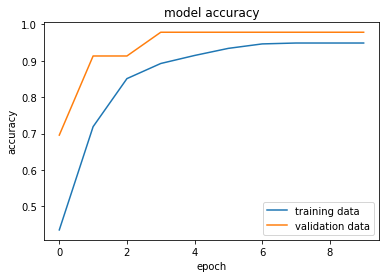

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

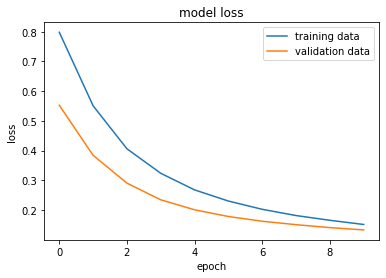

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

evaluating accuracy of deep learning model

In [76]:
loss, accuracy = model_d.evaluate(x_test, y_test)
print(accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 0.1655 - accuracy: 0.9298
0.9298245906829834


testing and evaluating accuracy of machine learning models

In [39]:
from sklearn.metrics import classification_report

for i in range(len(model)):
  print("Model",i)
  print(classification_report(y_test,model[i].predict(x_test)))
  print('Accuracy :',accuracy_score(y_test,model[i].predict(x_test)))
   


Model 0
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        69
           1       1.00      0.93      0.97        45

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy : 0.9736842105263158
Model 1
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        69
           1       0.89      0.89      0.89        45

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

Accuracy : 0.9122807017543859
Model 2
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        69
           1       0.95      0.91      0.93        45

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94 

In [46]:
y1=y_test.to_numpy()

In [48]:
pred1=model[0].predict(x_test)
print('real vs predicted value of given dataset using logistic Regression')
print('real:')
print(y1)
print('predicted')
print(pred1)

pred2=model[1].predict(x_test)
print('real vs predicted value of given dataset using Decision Tree')
print('real:')
print(y1)
print('predicted')
print(pred2)

pred3=model[2].predict(x_test)
print('real vs predicted value of given dataset using Decision Tree')
print('real:')
print(y1)
print('predicted')
print(pred3)

real vs predicted value of given dataset using logistic Regression
real:
[0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1
 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 1 1 1]
predicted
[0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1
 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 1 1 1]
real vs predicted value of given dataset using Decision Tree
real:
[0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1
 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 1 1 1]
predicted
[0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1

creating confusion matrix

The outcomes of any binary testing are represented as a matrix. The purpose of this examination is to
confirm if the lump being experienced by the subject is cancerous or benign. To depict the actual values and the predicted values,
confusion matrix is utilized.



In [98]:
from sklearn.metrics import confusion_matrix
print('confusion matrix for logistic regression model')
print(confusion_matrix(y1,pred1))
print('confusion matrix for Decision model')
print(confusion_matrix(y1,pred2))
print('confusion matrix for random forest model')
print(confusion_matrix(y1,pred3))

confusion matrix for logistic regression model
[[69  0]
 [ 3 42]]
confusion matrix for Decision model
[[64  5]
 [ 5 40]]
confusion matrix for random forest model
[[67  2]
 [ 4 41]]


prediction using machine learning algorithm

In [82]:
input_data=(17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction=model[0].predict(input_data_reshaped)
print(prediction)
prediction1=model[1].predict(input_data_reshaped)
print(prediction1)
prediction2=model[2].predict(input_data_reshaped)
print(prediction2)

if prediction and prediction1 and prediction2 :
  print('Tumor detected is malignant needs urgent medication')
else:
  print('Tumor detected is benign not that harmful you are safe')

[1]
[1]
[1]
Tumor detected is malignant needs urgent medication


prediction using deep learning model

In [94]:
# converting the prediction probability to class labels
y_pred=model_d.predict(x_test)
Y_pred_labels = [np.argmax(i) for i in y_pred]
print(Y_pred_labels)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction_d = model_d.predict(input_data_reshaped)
print(prediction_d)

prediction_label = [np.argmax(prediction_d)]
print(prediction_label)

if(prediction_label[0] == 1):
  print('The tumor is Malignant ')

else:
  print('The tumor is Benign')

4/4 [==============================] - 0s 2ms/step
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
1/1 [==============================] - 0s 16ms/step
[[0.0000000e+00 2.0717961e-16]]
[1]
The tumor is Malignant


In [79]:
#since logistic regression gave highest accuracy among all 4 models hence dumping model 0
from joblib import dump
dump(model[0],'cancer_prediction_model.joblib')

['cancer_prediction_model.joblib']